# Part 2

In [2]:
#Q1
def convert10ToBase(number, base):
    if base !=2 and base !=16 and base!=8:  #we asked to craete a function that convert only these bases
        return "invalid syntax, change your base"
    ans = []  
    while number > 0:   #this is the stop condition  
        rem= number%base 
        if rem > 9 :  #this is a condition for the base 16
            ans.append(chr(ord('A')+rem-10))
            number //= base
        else:
            ans.append(rem%base) #we are adding to the array ans the rest of the division 
            number //= base
    ans.reverse() #we want to return the array from the end to the start
    return  "".join(str(i) for i in ans)

print (convert10ToBase(255, 2))       #11111111
print (convert10ToBase(25, 8))        # 31
print (convert10ToBase(65535, 16))    # FFFF

11111111
31
FFFF


In [34]:
import pandas as pd
import numpy as np
cast= pd.read_csv('./cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [23]:
len(cast[cast['title'] == 'Hamlet'])

299

In [40]:
cast[cast.title == "Treasure Island"].sort_values(by='year')

,title,year,name,type,character,n
1312766,Treasure Island,1918,Herschel Mayall,actor,Prologue Player,NaN
3280557,Treasure Island,1918,Eleanor Washington,actress,Prologue Player,NaN
3046750,Treasure Island,1918,Violet Radcliffe,actress,Long John Silver,3.0
1167783,Treasure Island,1918,Raymond Lee,actor,Bit Role,NaN
1195421,Treasure Island,1918,Elmo Lincoln,actor,Prologue Player,NaN
...,...,...,...,...,...,...
1663860,Treasure Island,1999,Victor Raider-Wexler,actor,Samowitz,10.0
1731182,Treasure Island,1999,Scot Thomas Robinson,actor,Jimmy,11.0
1813707,Treasure Island,1999,Richard Schave,actor,Man,21.0
2710458,Treasure Island,1999,Stephanie Ittleson,actress,Stella,7.0


In [41]:
len(cast[(cast.title == "Hamlet") & (cast.year == 1921)])

9

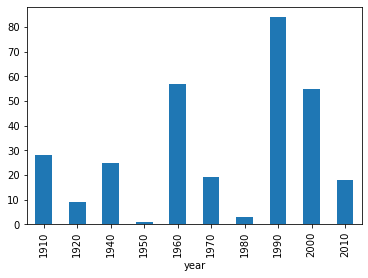

In [47]:
hamletGrup = cast[cast.title == "Hamlet"] 
hamletGrup.groupby(hamletGrup.year // 10 *10).size().plot(kind='bar')

In [52]:
new = cast
new = new[new.year // 10 == 195]
new = new[new.n == 1]
new.groupby(['year', 'type']).size()

year  type   
1950  actor      604
      actress    271
1951  actor      633
      actress    272
1952  actor      591
      actress    284
1953  actor      634
      actress    290
1954  actor      626
      actress    298
1955  actor      606
      actress    264
1956  actor      614
      actress    288
1957  actor      708
      actress    284
1958  actor      694
      actress    275
1959  actor      678
      actress    287
dtype: int64

In [108]:
new = cast
new = new[new['year'].between(1990,2020, inclusive=False)]
new = new[new.n == 1]
((new.groupby(['year','name']).size().sort_values(ascending=False)).head(10))

year  name            
2007  Dan Castellaneta    21
2012  Stefan Kramer       18
2014  John Cleese         16
2015  Eric Roberts        15
1999  Trey Parker         14
2013  Ed Skudder          13
2002  Phil Vischer        13
2010  Kyle Rea            13
2004  Trey Parker         13
      Phil Cornwell       13
dtype: int64

In [105]:
c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['year','title']).size()
g[g > 1].sort_values( na_position='first')

year  title                                   
1981  An American Werewolf in London              2
1982  The Dark Crystal                            2
1985  Sesame Street Presents: Follow that Bird    3
1999  The Adventures of Elmo in Grouchland        3
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
1981  The Great Muppet Caper                      6
1984  The Muppets Take Manhattan                  7
1992  The Muppet Christmas Carol                  7
1979  The Muppet Movie                            8
dtype: int64